## Model Fitting and Evaluating _21.06.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [2]:
data = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

In [3]:
categorical = data.select_dtypes(include=['object', 'category'])
numerical = data.select_dtypes(include=['int', 'float'])
print("Categorical variables:")
print(categorical.columns)
print("\nNumerical variables:")
print(numerical.columns)

Categorical variables:
Index(['region', 'response', 'coverage', 'education', 'effective_to_date',
       'month', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

Numerical variables:
Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')


In [4]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [5]:
categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [6]:
numerical_cols = ['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount']  # List of numerical column names
categorical_cols = ['region', 'response', 'coverage', 'education', 'effective_to_date',
       'month', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size']  # List of categorical column names
target_col =  'total_claim_amount' # Name of the target column


In [7]:
print(numerical_cols)

['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']


In [8]:
print(categorical_cols)

['region', 'response', 'coverage', 'education', 'effective_to_date', 'month', 'employment_status', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']


In [9]:
print(target_col)

total_claim_amount


In [10]:

# Select the categorical columns you want to encode
categorical_cols = ['region', 'response', 'coverage', 'education', 'effective_to_date',
       'month', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size']

# Extract the categorical data from the DataFrame
categorical_data = data[categorical_cols]

# Perform one-hot encoding using pandas get_dummies() function
encoded_data = pd.get_dummies(categorical_data)

# Concatenate the encoded data with the remaining columns from the original DataFrame
final_data = pd.concat([data.drop(columns=categorical_cols), encoded_data], axis=1)

# Save the encoded data to a new CSV file
final_data.to_csv('encoded_data.csv', index=False)

In [11]:
data_end = pd.read_csv('encoded_data.csv')
pd.read_csv('encoded_data.csv')

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,region_central,region_east,...,sales_channel_web,vehicle_class_four-door car,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_large,vehicle_size_medsize,vehicle_size_small
0,4809,48029,61,7,52,0,9,292,1,0,...,0,1,0,0,0,0,0,0,1,0
1,2228,92260,64,3,26,0,1,744,0,0,...,0,1,0,0,0,0,0,0,1,0
2,14947,22139,100,34,31,0,2,480,0,1,...,0,0,0,0,0,1,0,0,1,0
3,22332,49078,97,10,3,0,2,484,0,0,...,0,1,0,0,0,0,0,0,1,0
4,9025,23675,117,33,31,0,7,707,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214,1,0,...,1,0,1,0,0,0,0,0,1,0
10685,5259,61146,65,7,68,0,6,273,0,0,...,0,1,0,0,0,0,0,0,1,0
10686,23893,39837,201,11,63,0,2,381,1,0,...,1,0,0,1,0,0,0,0,1,0
10687,11971,64195,158,0,27,4,6,618,0,0,...,0,0,0,0,0,1,0,0,1,0


In [12]:
data_end

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,region_central,region_east,...,sales_channel_web,vehicle_class_four-door car,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_large,vehicle_size_medsize,vehicle_size_small
0,4809,48029,61,7,52,0,9,292,1,0,...,0,1,0,0,0,0,0,0,1,0
1,2228,92260,64,3,26,0,1,744,0,0,...,0,1,0,0,0,0,0,0,1,0
2,14947,22139,100,34,31,0,2,480,0,1,...,0,0,0,0,0,1,0,0,1,0
3,22332,49078,97,10,3,0,2,484,0,0,...,0,1,0,0,0,0,0,0,1,0
4,9025,23675,117,33,31,0,7,707,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214,1,0,...,1,0,1,0,0,0,0,0,1,0
10685,5259,61146,65,7,68,0,6,273,0,0,...,0,1,0,0,0,0,0,0,1,0
10686,23893,39837,201,11,63,0,2,381,1,0,...,1,0,0,1,0,0,0,0,1,0
10687,11971,64195,158,0,27,4,6,618,0,0,...,0,0,0,0,0,1,0,0,1,0


In [13]:
data_end.dtypes

customer_lifetime_value          int64
income                           int64
monthly_premium_auto             int64
months_since_last_claim          int64
months_since_policy_inception    int64
                                 ...  
vehicle_class_suv                int64
vehicle_class_two-door car       int64
vehicle_size_large               int64
vehicle_size_medsize             int64
vehicle_size_small               int64
Length: 125, dtype: object

In [14]:
categorical_end = data_end.select_dtypes(include=['object', 'category'])
numerical_end = data_end.select_dtypes(include=['int', 'float'])
print("Categorical variables:")
print(categorical_end.columns)
print("\nNumerical variables:")
print(numerical_end.columns)

Categorical variables:
Index([], dtype='object')

Numerical variables:
Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'region_central', 'region_east',
       ...
       'sales_channel_web', 'vehicle_class_four-door car',
       'vehicle_class_luxury car', 'vehicle_class_luxury suv',
       'vehicle_class_sports car', 'vehicle_class_suv',
       'vehicle_class_two-door car', 'vehicle_size_large',
       'vehicle_size_medsize', 'vehicle_size_small'],
      dtype='object', length=125)


#### X-y split (y is the target variable, in this case, "total claim amount")

In [15]:
X = numerical_end
y = numerical_end['total_claim_amount']

#### Train-test split

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print (X_train)

       customer_lifetime_value  income  monthly_premium_auto  \
9877                     21423   22379                    65   
10069                     8391   40211                   106   
10317                     3969   49544                   101   
9796                     14914   45963                    63   
8995                     18060   57882                   115   
...                        ...     ...                   ...   
5734                      7610   98701                    94   
5191                     35186   86134                    98   
5390                      4241   19834                    64   
860                      12941   77060                   106   
7270                      6947   63406                   100   

       months_since_last_claim  months_since_policy_inception  \
9877                         9                             31   
10069                        5                             98   
10317                        3      

In [18]:
from sklearn.preprocessing import StandardScaler

# Assume you have X_train and X_test from the train-test split
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Apply the scaler to both the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
print(X_train_scaled)

[[ 1.96075094 -1.19107411 -0.81840932 ... -0.339129    0.64277123
  -0.48309068]
 [ 0.05783754 -0.46959622  0.36746951 ... -0.339129   -1.55576348
   2.07000475]
 [-0.58785637 -0.09198556  0.22285014 ... -0.339129    0.64277123
  -0.48309068]
 ...
 [-0.54813933 -1.29404412 -0.84733319 ... -0.339129   -1.55576348
   2.07000475]
 [ 0.72222183  1.02130435  0.36746951 ... -0.339129    0.64277123
  -0.48309068]
 [-0.15301321  0.46886721  0.19392627 ... -0.339129    0.64277123
  -0.48309068]]


In [20]:
print(X_test_scaled)

[[-0.45614766  0.84279603 -0.93410481 ... -0.339129    0.64277123
  -0.48309068]
 [ 0.18078514 -0.37293792  0.62778438 ... -0.339129    0.64277123
  -0.48309068]
 [-0.69970656  0.66970931 -0.38455121 ... -0.339129    0.64277123
  -0.48309068]
 ...
 [-0.57821915  1.30140706  0.54101276 ... -0.339129    0.64277123
  -0.48309068]
 [-0.11022978 -0.768715   -0.00854085 ... -0.339129    0.64277123
  -0.48309068]
 [ 0.33366653  0.88378173  1.00379474 ... -0.339129    0.64277123
  -0.48309068]]


#### Apply linear regression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm = LinearRegression()
model = lm.fit(X_train_scaled,y_train)

In [23]:
model.intercept_

432.7827154718746

In [24]:
model.coef_

array([ 3.72728550e-14, -5.68434189e-14, -2.84217094e-14, -1.59872116e-14,
       -7.10542736e-15, -7.81597009e-14,  3.46389584e-14,  2.94393937e+02,
       -9.92520573e-01, -6.14232314e-01, -9.89425950e-01, -1.04797469e+00,
        7.09026935e-01,  7.09026935e-01,  6.04480797e-01,  5.67799773e-01,
        3.53626002e-01,  8.15350321e-01,  8.09086806e-01,  3.32143098e-01,
        8.02722943e-01,  4.90935861e-01,  1.61097299e-01,  2.00300049e-01,
        1.77112681e-01,  1.60471329e-01,  1.67220208e-01,  1.70781802e-01,
        1.65408675e-01,  1.67819417e-01,  1.88038208e-01,  1.66618697e-01,
        1.85372113e-01,  1.67819417e-01,  1.75979794e-01,  1.79911333e-01,
        1.62959893e-01,  1.68416351e-01,  1.69603486e-01,  1.66014862e-01,
        1.85908652e-01,  1.97814015e-01,  1.76547215e-01,  1.68416351e-01,
        1.86443516e-01,  1.61097299e-01,  1.82663791e-01,  1.48044822e-01,
        1.75410399e-01,  1.62341552e-01,  1.67220208e-01,  1.75410399e-01,
        1.71951479e-01, -

In [25]:
print(model.coef_)
print (model.intercept_)

[ 3.72728550e-14 -5.68434189e-14 -2.84217094e-14 -1.59872116e-14
 -7.10542736e-15 -7.81597009e-14  3.46389584e-14  2.94393937e+02
 -9.92520573e-01 -6.14232314e-01 -9.89425950e-01 -1.04797469e+00
  7.09026935e-01  7.09026935e-01  6.04480797e-01  5.67799773e-01
  3.53626002e-01  8.15350321e-01  8.09086806e-01  3.32143098e-01
  8.02722943e-01  4.90935861e-01  1.61097299e-01  2.00300049e-01
  1.77112681e-01  1.60471329e-01  1.67220208e-01  1.70781802e-01
  1.65408675e-01  1.67819417e-01  1.88038208e-01  1.66618697e-01
  1.85372113e-01  1.67819417e-01  1.75979794e-01  1.79911333e-01
  1.62959893e-01  1.68416351e-01  1.69603486e-01  1.66014862e-01
  1.85908652e-01  1.97814015e-01  1.76547215e-01  1.68416351e-01
  1.86443516e-01  1.61097299e-01  1.82663791e-01  1.48044822e-01
  1.75410399e-01  1.62341552e-01  1.67220208e-01  1.75410399e-01
  1.71951479e-01 -1.59086480e+00 -1.59086480e+00 -1.64983814e+00
 -1.61795688e+00 -1.50065183e+00 -1.73177428e+00 -1.47718103e+00
 -1.50065183e+00 -1.49482

#### Model Interpretation

In [26]:
y_pred = model.predict(X_test_scaled)

In [27]:
y_test.shape

(2138,)

In [28]:
compare = pd.DataFrame({'y_test':list(y_test), 'y_pred':list(y_pred)})

In [29]:
compare

,y_test,y_pred
0,120,120.0
1,660,660.0
2,244,244.0
3,86,86.0
4,1032,1032.0
...,...,...
2133,285,285.0
2134,494,494.0
2135,537,537.0
2136,446,446.0


In [30]:
y_test - y_pred

3487     5.684342e-13
668     -3.410605e-13
10315    1.421085e-13
5332     2.842171e-13
1523     9.094947e-13
             ...     
7089     2.273737e-13
2507     0.000000e+00
7965     6.821210e-13
8523    -1.705303e-13
9803     2.842171e-13
Name: total_claim_amount, Length: 2138, dtype: float64

#### Model Interpretation

In [31]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [32]:
mse(y_test,y_pred)

1.8605813259482915e-25

In [33]:
mae(y_test, y_pred)

3.2658378651858526e-13

In [49]:
import numpy as np

# Assuming y_actual and y_predicted are numpy arrays or lists of the actual and predicted values, respectively

# Calculate the squared differences
squared_diff = (y_test - y_pred) ** 2

# Calculate the mean squared difference
mean_squared_diff = np.mean(squared_diff)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_diff)

print("RMSE:", rmse)

RMSE: 4.313445636551238e-13


In [50]:
from sklearn.metrics import r2_score

# Assuming y_test and y_pred are numpy arrays or lists of the actual and predicted values, respectively

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

print("R2 Score:", r2)

R2 Score: 1.0


In [51]:
r2 = r2_score(y_test, y_pred)

# Get the number of samples (n) and predictors (p)
n = len(y_test)
p = 1  # Replace with the actual number of predictors

# Calculate Adjusted R2
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("Adjusted R2 Score:", adjusted_r2)

Adjusted R2 Score: 1.0


In [52]:
import matplotlib.pyplot as plt

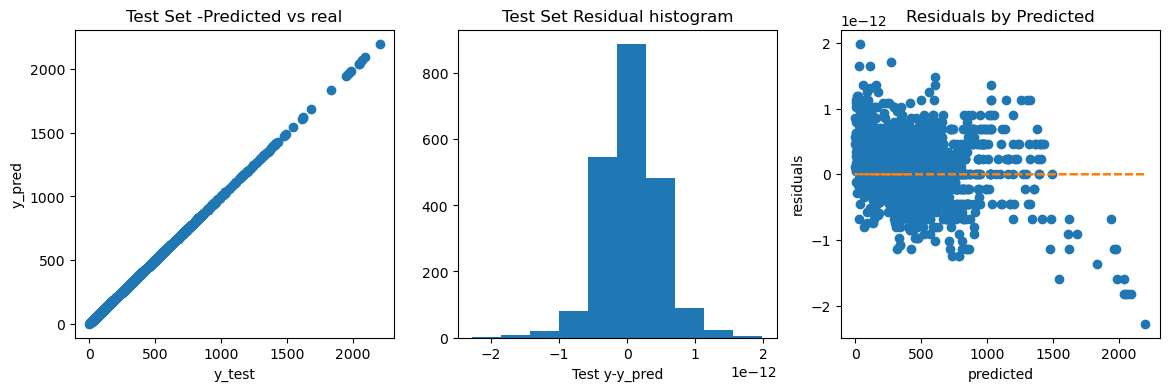

In [53]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscedasticity
# Does it resemble a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

#### Feature Importance

In [54]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
model = lm.fit(X_train_scaled,y_train)
coefficients = model.coef_
absolute_coefficients = abs(coefficients)

print(absolute_coefficients)

[3.72728550e-14 5.68434189e-14 2.84217094e-14 1.59872116e-14
 7.10542736e-15 7.81597009e-14 3.46389584e-14 2.94393937e+02
 9.92520573e-01 6.14232314e-01 9.89425950e-01 1.04797469e+00
 7.09026935e-01 7.09026935e-01 6.04480797e-01 5.67799773e-01
 3.53626002e-01 8.15350321e-01 8.09086806e-01 3.32143098e-01
 8.02722943e-01 4.90935861e-01 1.61097299e-01 2.00300049e-01
 1.77112681e-01 1.60471329e-01 1.67220208e-01 1.70781802e-01
 1.65408675e-01 1.67819417e-01 1.88038208e-01 1.66618697e-01
 1.85372113e-01 1.67819417e-01 1.75979794e-01 1.79911333e-01
 1.62959893e-01 1.68416351e-01 1.69603486e-01 1.66014862e-01
 1.85908652e-01 1.97814015e-01 1.76547215e-01 1.68416351e-01
 1.86443516e-01 1.61097299e-01 1.82663791e-01 1.48044822e-01
 1.75410399e-01 1.62341552e-01 1.67220208e-01 1.75410399e-01
 1.71951479e-01 1.59086480e+00 1.59086480e+00 1.64983814e+00
 1.61795688e+00 1.50065183e+00 1.73177428e+00 1.47718103e+00
 1.50065183e+00 1.49482079e+00 1.61795688e+00 1.65508753e+00
 1.57436975e+00 1.471251

In [55]:
coefs = np.array([[3.72728550e-14, -5.68434189e-14, -2.84217094e-14, -1.59872116e-14,
       -7.10542736e-15, -7.81597009e-14,  3.46389584e-14,  2.94393937e+02,
       -9.92520573e-01, -6.14232314e-01, -9.89425950e-01, -1.04797469e+00,
        7.09026935e-01,  7.09026935e-01,  6.04480797e-01,  5.67799773e-01,
        3.53626002e-01,  8.15350321e-01,  8.09086806e-01,  3.32143098e-01,
        8.02722943e-01,  4.90935861e-01,  1.61097299e-01,  2.00300049e-01,
        1.77112681e-01,  1.60471329e-01,  1.67220208e-01,  1.70781802e-01,
        1.65408675e-01,  1.67819417e-01,  1.88038208e-01,  1.66618697e-01,
        1.85372113e-01,  1.67819417e-01,  1.75979794e-01,  1.79911333e-01,
        1.62959893e-01,  1.68416351e-01,  1.69603486e-01,  1.66014862e-01,
        1.85908652e-01,  1.97814015e-01,  1.76547215e-01,  1.68416351e-01,
        1.86443516e-01,  1.61097299e-01,  1.82663791e-01,  1.48044822e-01,
        1.75410399e-01,  1.62341552e-01,  1.67220208e-01,  1.75410399e-01,
        1.71951479e-01, -1.59086480e+00, -1.59086480e+00, -1.64983814e+00,
       -1.61795688e+00, -1.50065183e+00, -1.73177428e+00, -1.47718103e+00,
       -1.50065183e+00, -1.49482079e+00, -1.61795688e+00, -1.65508753e+00,
       -1.57436975e+00, -1.47125125e+00, -1.57436975e+00, -1.67072918e+00,
       -1.55208470e+00, -1.48896551e+00, -1.59086480e+00, -1.67072918e+00,
       -1.64457072e+00, -1.61795688e+00, -1.63398107e+00, -1.67072918e+00,
       -1.54645986e+00, -1.57436975e+00, -1.58538685e+00, -1.48308568e+00,
       -1.61257749e+00,  7.14823251e+00,  2.95250504e-01, -4.34273793e-01,
       -1.02401395e+00, -4.38109903e-01, -3.46271693e-01, -9.24646150e-01,
       -6.67635903e+00, -6.67635903e+00,  3.20752388e+00,  3.87869266e+00,
        3.03539449e+00,  2.14830578e+00,  3.00252126e+00,  2.71177176e+00,
       -4.73893606e+00, -4.54203456e+00, -1.67922727e+00, -9.44426268e-01,
       -1.17529600e+00, -1.51706446e+00, -2.01560522e+00, -2.46522629e+00,
       -2.83157637e+00, -6.48184191e-01, -1.00777631e+00, -9.70498033e-01,
        4.41615190e-01,  4.18166587e-01,  3.29146102e-01,  2.84435432e-01,
        4.74020392e+00,  4.37356302e+00,  3.90703029e+00,  3.50680055e+00,
       -2.23728368e+00, -6.11891987e-01, -6.38855002e-01, -1.01059344e+00,
       -1.77513264e+00, -1.80991262e+00, -5.87258304e-01, -8.78231653e-01,
       -7.56267372e-01]])

In [56]:
column_names = X.columns
coef_df = pd.DataFrame ({"column_names": column_names, "coefs": coefs.flatten()})

print(coef_df)

                      column_names         coefs
0          customer_lifetime_value  3.727285e-14
1                           income -5.684342e-14
2             monthly_premium_auto -2.842171e-14
3          months_since_last_claim -1.598721e-14
4    months_since_policy_inception -7.105427e-15
..                             ...           ...
120              vehicle_class_suv -1.775133e+00
121     vehicle_class_two-door car -1.809913e+00
122             vehicle_size_large -5.872583e-01
123           vehicle_size_medsize -8.782317e-01
124             vehicle_size_small -7.562674e-01

[125 rows x 2 columns]


In [57]:
coef_df

,column_names,coefs
0,customer_lifetime_value,3.727285e-14
1,income,-5.684342e-14
2,monthly_premium_auto,-2.842171e-14
3,months_since_last_claim,-1.598721e-14
4,months_since_policy_inception,-7.105427e-15
...,...,...
120,vehicle_class_suv,-1.775133e+00
121,vehicle_class_two-door car,-1.809913e+00
122,vehicle_size_large,-5.872583e-01
123,vehicle_size_medsize,-8.782317e-01


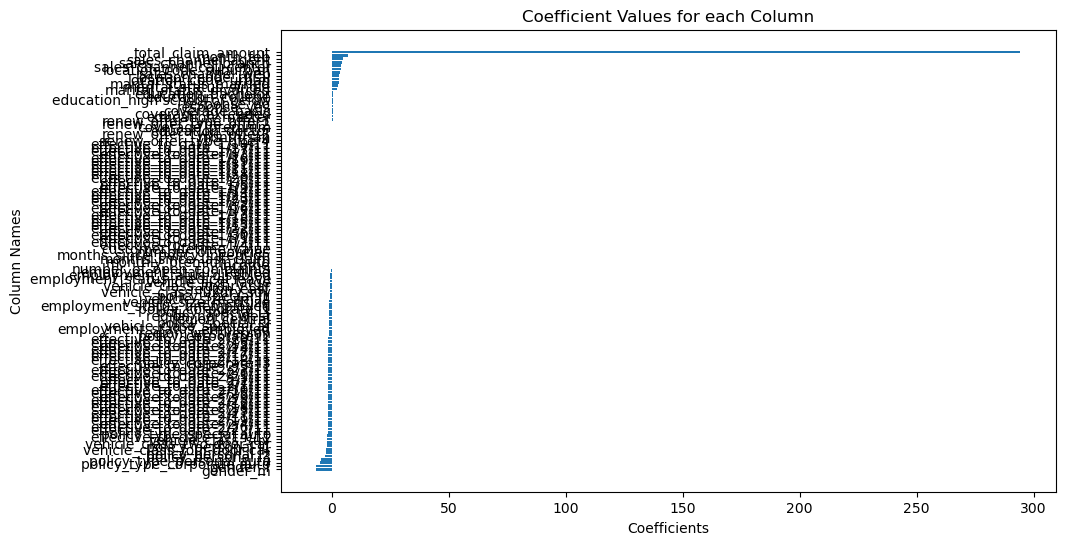

In [58]:
# Sorting the DataFrame by "coefs" column in ascending order
coef_df_sorted = coef_df.sort_values(by="coefs")
# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
plt.barh(coef_df_sorted["column_names"], coef_df_sorted["coefs"])
plt.xlabel("Coefficients")
plt.ylabel("Column Names")
plt.title("Coefficient Values for each Column")
plt.show()